In [17]:
import pandas as pd
import seaborn as sns

In [18]:
our_color_palette = {"WT": "#F2C14E", # yellow
                     "W": "#F2C14E", # yellow
                     "IP": "#79ADDC", # blue
                     "I": "#79ADDC", # blue
                     "KO": "#B279A7", # purple
                     "K": "#B279A7", # purple
                    } 
treatments_list = ["W", "I", "K"]
passages_list = ["p1", "p2", "p3", "p5", "p10"]
replicates_list = ['a', 'b', 'c']

## load diversity for cgamp-sting study

In [25]:
df = pd.read_csv('../../results_summary/all_snpgenie_population_summary.csv')

df['genotype'] = df['passage'].str.split("_").str[0]
df['rep'] = df['passage'].str.split("_").str[-1]
df['passage'] = df['passage'].str.split("_").str[1].str.split('p').str[-1]

df = df[df['virus']=='CrPV']

In [26]:
# get parental values
p0_dcv_pi = df[(df['genotype']=='parental') & (df['virus']=='CrPV') ]['pi'].values[0]

In [27]:
df = df[['pi','genotype','rep','passage']]
df.loc[df['genotype']=='parental', 'genotype'] ='W'

## plot

In [28]:
df['passage'].unique()

array(['0', '1', '2', '3', '5', '10'], dtype=object)

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_8990/1290992764.py:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.1}` instead.

  g = sns.pointplot(df,


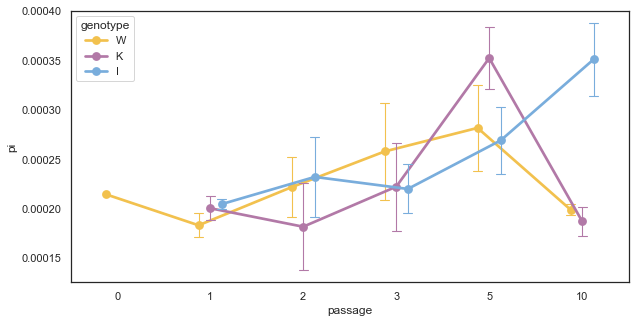

In [29]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('white')

g = sns.pointplot(df, 
                x='passage', 
                order=[ 0, 1, 2, 3, 5, 10], 
                y='pi', 
                hue='genotype', 
                markers='o', 
                linestyles='-',
                dodge=0.25,
                errorbar='se',
                errwidth=1.1, 
                  capsize=0.1,
                palette=our_color_palette, 
                )


## check for pis and piN 

In [31]:
fname = "../../results_summary/all_snpgenie_codon_results.csv"
df = pd.read_csv(fname)

df = df[df['virus']=='CrPV']

df['genotype'] = df['passage'].str.split("_").str[0]
df['rep'] = df['passage'].str.split("_").str[-1]
df['passage'] = df['passage'].str.split("_").str[1].str.split("p").str[-1].astype(int)
df.loc[df['genotype']=='parental', 'genotype'] ='W'

df = df[['S_diffs', 'N_diffs', 'S_sites', 'N_sites', 'genotype','rep','passage']]

In [33]:
# per codon measurement

# piS: The mean number of pairwise synonymous differences per synonymous site in this product.
df['piS'] = df['S_diffs']/df['S_sites']

# piN: The mean number of pairwise nonsynonymous differences per nonsynonymous site in this product.
df['piN'] = df['N_diffs']/df['N_sites']

In [34]:
df = df.groupby(by=['genotype', 'rep', 'passage']).mean().reset_index()
df = df[['genotype', 'rep', 'passage', 'piS', 'piN']]

In [35]:
df_long= pd.wide_to_long(df, 
                        stubnames="pi",
                                      i=["genotype", "passage", "rep"],
                                      j="type",
                                      suffix="\D+",).reset_index()

In [36]:
df_long

,genotype,passage,rep,type,pi
0,I,1,a,S,0.000661
1,I,1,a,N,0.000054
2,I,2,a,S,0.000992
3,I,2,a,N,0.000075
4,I,3,a,S,0.001320
...,...,...,...,...,...
87,W,5,c,N,0.000100
88,W,10,c,S,0.000489
89,W,10,c,N,0.000120
90,W,0,p0,S,0.000449


/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_8990/318218490.py:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.1}` instead.

  g = sns.catplot(df_long,


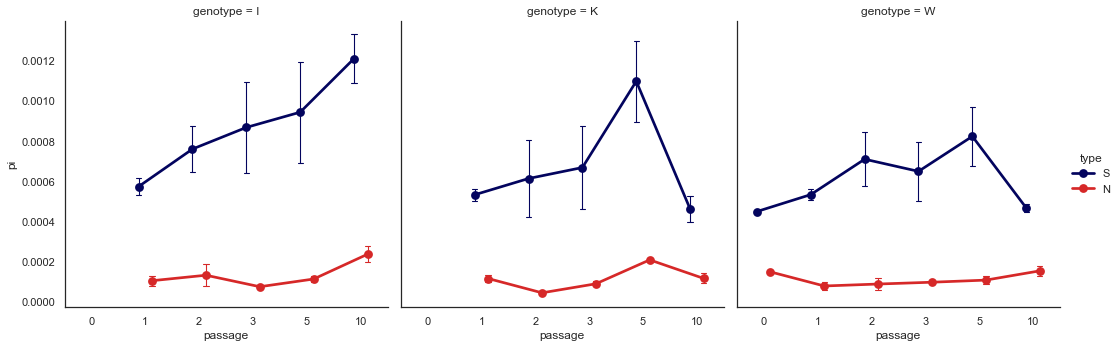

In [37]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('white')

g = sns.catplot(df_long, 
                x='passage',
                kind='point',
                order=[0, 1, 2, 3, 5, 10], 
                col='genotype', 
                y='pi', 
                hue='type', 
                markers='o', 
                linestyles='-',
                dodge=0.25,
                errorbar='se',
                errwidth=1.1, 
                  capsize=0.1,
                palette={"S": '#03045e', "N": '#d62828'}, 
                )
